In [1]:
%load_ext autoreload
%autoreload 2

# Boltz-2 results analysis

In [2]:
import os
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
from ViennaRNA import RNA
import sys

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

__package__ = os.path.basename(module_path)

In [3]:
from src.utils.visualisation import show_rna_structure, draw_rna_plddt_varna


In [4]:
job_name = 'bzjob_4_hfq_tri_gfpmut3'
fn_job = f'boltz/jobs/{job_name}.yaml'

dir_result = f'boltz/results/boltz_results_{job_name}'

with open(fn_job, 'r') as f:
    job_config = yaml.safe_load(f)


In [5]:
entities = {}
len_seq_cummu = 0
for i, m in enumerate(job_config['sequences']):
    entity_type = list(m.keys())[0]
    m[entity_type]
    entities[m[entity_type]['id'] + '_' + entity_type] = {
        'sequence': m[entity_type]['sequence'],
        'type': entity_type,
        'index': i,
        'index_seq': len_seq_cummu
    }
    len_seq_cummu += len(m[entity_type]['sequence'])

entities

{'HfqA_protein': {'sequence': 'MAKGQSLQDPFLNALRRERVPVSIYLVNGIKLQGQIESFDQFVILLKNTVSQMVYKHAISTVVPSRPVSHHSNNAGGGTSSNYHHGSSAQNTSAQQDSEETE',
  'type': 'protein',
  'index': 0,
  'index_seq': 0},
 'HfqB_protein': {'sequence': 'MAKGQSLQDPFLNALRRERVPVSIYLVNGIKLQGQIESFDQFVILLKNTVSQMVYKHAISTVVPSRPVSHHSNNAGGGTSSNYHHGSSAQNTSAQQDSEETE',
  'type': 'protein',
  'index': 1,
  'index_seq': 102},
 'HfqC_protein': {'sequence': 'MAKGQSLQDPFLNALRRERVPVSIYLVNGIKLQGQIESFDQFVILLKNTVSQMVYKHAISTVVPSRPVSHHSNNAGGGTSSNYHHGSSAQNTSAQQDSEETE',
  'type': 'protein',
  'index': 2,
  'index_seq': 204},
 'GFPmu_rna': {'sequence': 'AUGAGCAAAGGCGAAGAACUGUUUACCGGCGUGGUGCCGAUUCUGGUGGAACUGGAUGGCGAUGUGAACGGCCAUAAAUUUAGCGUGAGCGGCGAAGGCGAAGGCGAUGCGACCUAUGGCAAACUGACCCUGAAAUUUAUUUGCACCACCGGCAAACUGCCGGUGCCGUGGCCGACCCUGGUGACCACCUUUAGCUAUGGCGUGCAGUGCUUUAGCCGCUAUCCGGAUCAUAUGAAACAGCAUGAUUUUUUUAAAAGCGCGAUGCCGGAAGGCUAUGUGCAGGAACGCACCAUUUUUUUUAAAGAUGAUGGCAACUAUAAAACCCGCGCGGAAGUGAAAUUUGAAGGCGAUACCCUGGUGAACCGCAUUGAACUGAAAGGCAUUGAUUUUAAAGAAGA

## PAE across RNA sequence

In [6]:
fn_pae = os.path.join(dir_result, 'predictions', job_name, f'pae_{job_name}_model_0.npz')
fn_plddt = os.path.join(dir_result, 'predictions', job_name, f'plddt_{job_name}_model_0.npz')

data = np.load(fn_pae)
pae = data['pae']

data = np.load(fn_plddt)
plddt = data['plddt']

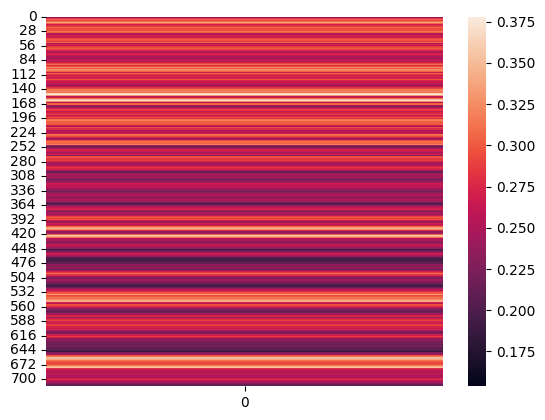

In [7]:
for k, v in entities.items():
    
    if v['type'] != 'rna':
        continue
    
    start = v['index_seq']
    end = start + len(v['sequence'])

    # sns.heatmap(pae[start:end, start:end], vmin=0, vmax=30)
    sns.heatmap(plddt[start:end, None])

## Structure visualisation

In [28]:
for k, v in entities.items():
    if v['type'] != 'rna':
        continue
    seq = v['sequence']
    folded = RNA.fold_compound(seq)
    sstructure, mfe = folded.mfe()

    # v = Structure(structure=folded[0], sequence=seq)
    # v._params['resolution'] = 7
    # v.show()
    # v.savefig("example.png", show=True)

    # show_rna_structure(sstructure, seq, resolution=5,
    #                    highlight_kwrgs={
    #                        'i': 44,
    #                        'j': 64
    #                    })
    
    draw_rna_plddt_varna(sstructure, seq, plddt[start:end], 
                         out_file=f'boltz/results/boltz_results_{job_name}/plddt_varna_{k}.png',
                         resolution=20, palette='RdBu', caption=f'plDDT [{plddt[start:end].min():.2f}, {plddt[start:end].max():.2f}]',
                         algorithm='radiate')

Output file: boltz/results/boltz_results_bzjob_4_hfq_tri_gfpmut3/plddt_varna_GFPmu_rna.png

Output file: /tmp/tmp90fi7l_0.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="395px" height="600px" version="1.1" viewBox="0 0 1000 1500" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="450.74345388346774" y1="1399.0035399233593" x2="458.24345388346774" y2="1399.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="468.24345388346774" y1="1399.0035399233593" x2="475.74345388346774" y2="1399.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="485.74345388346774" y1="1399.0035399233593" x2="493.24345388346774" y2="1399.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="503.24345388346774" y1="1399.0035399233593" x2="510.74345388346774" y2="1399.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="520.7434538834677" y1="1399.0035399233593" x2="528.2434538834677" y2="1399.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="538.2434538834677" y1="1399.0035399233593" x2="545.7434538834677" y2="1399.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="555.7434538834677" y1="1399.0035399233593" x2="563.2434538834677" y2="1399.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="573.2434538834677" y1="1399.0035399233593" x2="580.7434538834677" y2="1399.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="590.7434538834677" y1="1399.0035399233593" x2="598.2434538834677" y2="1399.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="603.2434538834677" y1="1394.0035399233593" x2="603.2434538834677" y2="1384.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="603.2434538834677" y1="1374.0035399233593" x2="603.2434538834677" y2="1364.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="603.2434538834677" y1="1354.0035399233593" x2="603.2434538834677" y2="1344.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="603.2434538834677" y1="1334.0035399233593" x2="603.2434538834677" y2="1324.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="603.2434538834677" y1="1314.0035399233593" x2="603.2434538834677" y2="1304.0035399233593" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="598.8789762877853" y1="1296.564004041929" x2="592.3322680510457" y2="1292.9047047790384" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="584.7184762587914" y1="1286.664911373182" x2="579.8445110365855" y2="1280.9645321888545" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="574.8633309994322" y1="1272.4737906051625" x2="572.265535475249" y2="1265.4380732823217" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="570.5336677260577" y1="1255.7475892230564" x2="570.5336648631466" y2="1248.24759856757" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="572.2655252141958" y1="1238.5571131861234" x2="574.8633153670024" y2="1231.5213938800134" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="579.8444889219489" y1="1223.0306484934724" x2="584.7184497922334" y2="1217.3302655881473" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="586.2358934564787" y1="1208.839522184879" x2="582.7721581943948" y2="1199.4585553885302" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="579.3084229323108" y1="1190.0775885921817" x2="575.8446876702267" y2="1180.696621795833" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="572.3809524081427" y1="1171.3156549994842" x2="568.9172171460588" y2="1161.9346882031357" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="565.4534818839746" y1="1152.553721406787" x2="561.9897466218906" y2="1143.1727546104382" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="558.5260113598065" y1="1133.7917878140897" x2="555.0622760977226" y2="1124.410821017741" s